IMPORTING

In [25]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

COLORING FORMULA

In [26]:
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m". format(r, g, b, text)

DATA ANALYSIS

In [27]:
stars = pd.read_csv("C:/Users/e u n o i a/Downloads/Stars.csv")
print(stars.columns)
print(" ")
text = "FIRST ROWS"
print(colored(200,170,210, text))
print(stars.head())
print(" ")
print(" ")
text = "LAST ROWS"
print(colored(200,170,210, text))
print(stars.tail())

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')
 
FIRST ROWS 
   Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0
 
 
LAST ROWS 
     Temperature         L       R    A_M  Color Spectral_Class  Type
235        38940  374830.0  1356.0  -9.93   Blue              O     5
236        30839  834042.0  1194.0 -10.63   Blue              O     5
237         8829  537493.0  1423.0 -10.73  White              A     5
238         9235  404940.0  1112.0 -11.23  White              A     5
239        37882  294903.0  1783.0  -7.80   Blue              O     5


In [28]:
 stars.describe()


,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [29]:
stars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [30]:
textt = stars.size
print(colored(200,170,210, textt))

1680 


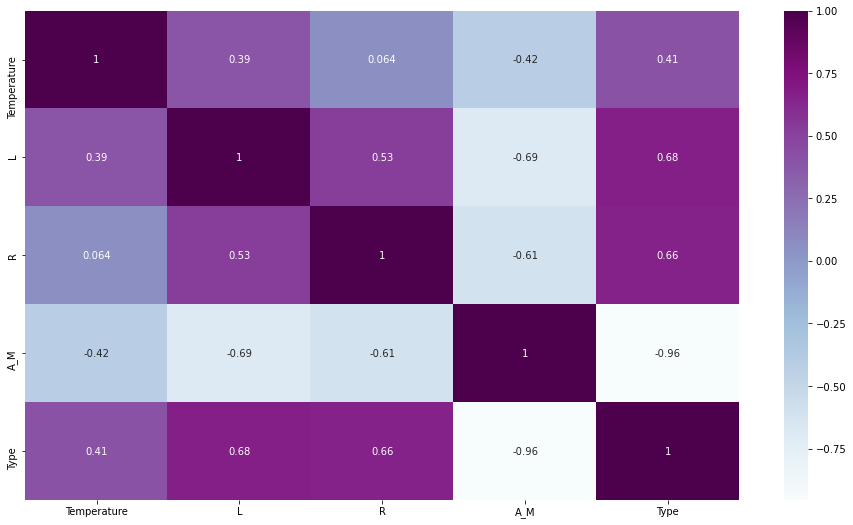

In [31]:
plt.figure(figsize=(16,9))
x = stars.drop(['Color','Spectral_Class'],axis = 1)
ax = sns.heatmap(stars.corr(),annot = True,cmap = 'BuPu')
plt.show()

DATA CLEANING

In [32]:
stars['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Orange                  2
Whitish                 2
yellowish               2
Blue-White              1
Pale yellow orange      1
Orange-Red              1
Yellowish               1
White-Yellow            1
Name: Color, dtype: int64

DATA VISUALISATION

<AxesSubplot:xlabel='count', ylabel='Color'>

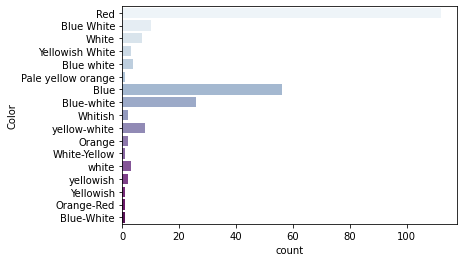

In [33]:
sns.countplot(y = "Color", data = stars, palette="BuPu")

c:\Users\e u n o i a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Temperature'>

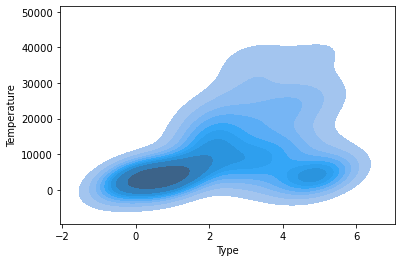

In [34]:
x = stars["Type"]
y = stars["Temperature"]

sns.kdeplot(x, y, palette="BuPu", shade=True)

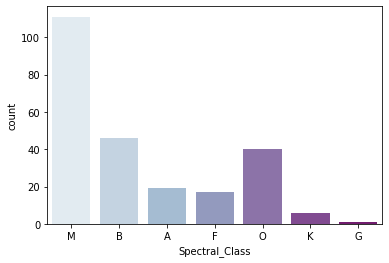

In [35]:
sns.countplot(x='Spectral_Class', data = stars, palette="BuPu")
plt.show()
#We have the most data on M class but G has only one case

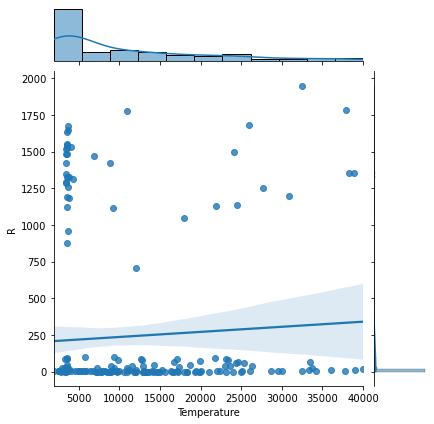

In [36]:
#Radius and Temperature
sns.jointplot(x = "Temperature", y = "R", data=stars, kind='reg', palette="BuPu" )

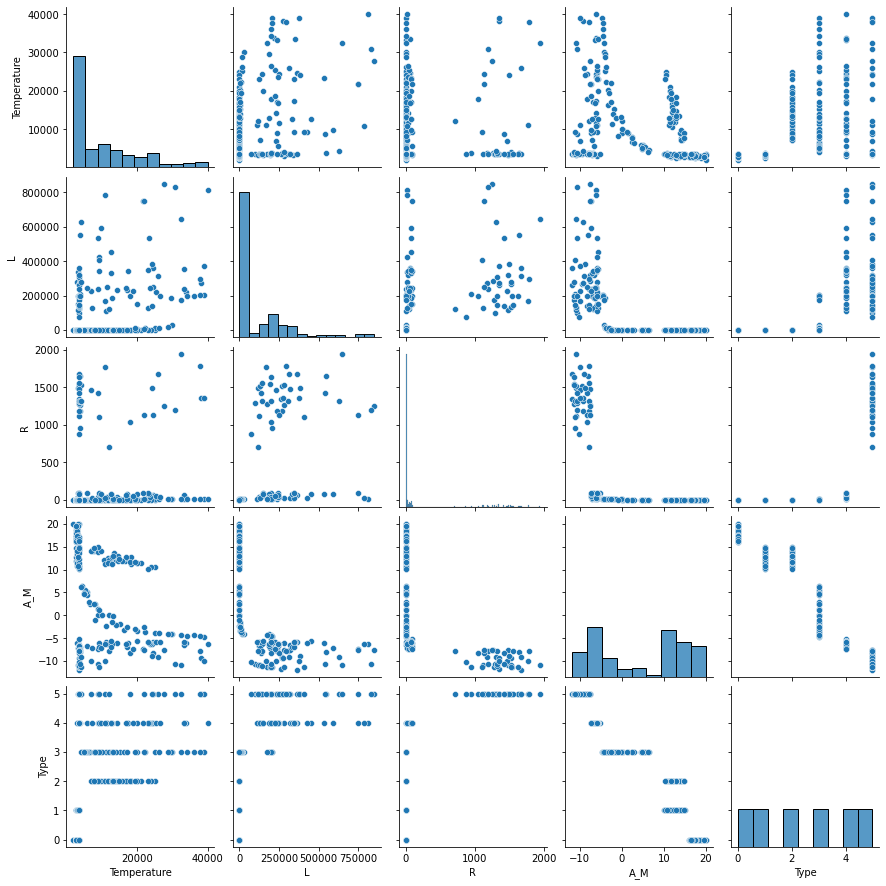

In [37]:
sns.pairplot(stars)

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'L'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'A_M'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>]],
      dtype=object)

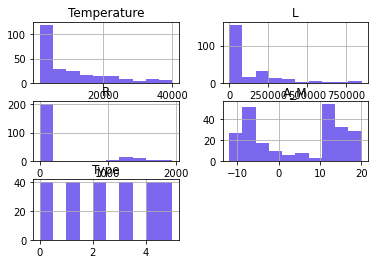

In [38]:
stars.hist(color = "mediumslateblue")

<AxesSubplot:title={'center':'spectral class by temperature'}, xlabel='Spectral_Class', ylabel='Temperature'>

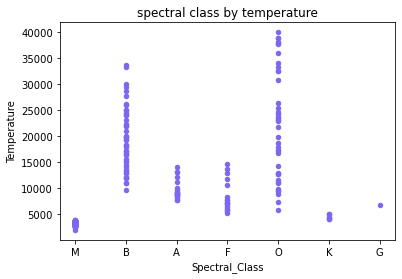

In [39]:
stars.plot( title = "spectral class by temperature", kind= "scatter", x = "Spectral_Class", y = "Temperature", color = "mediumslateblue")


Above we can see that:

* O class has in general the hottest stars (but also there is a whole spectrum)

* B is the next one 

* The coldest and the most comon in the dataset is M

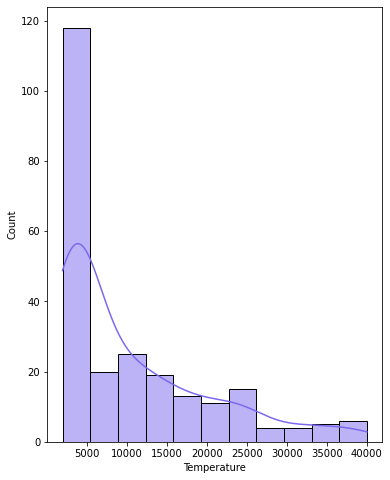

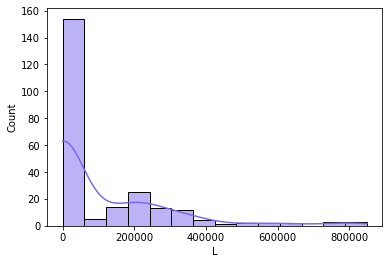

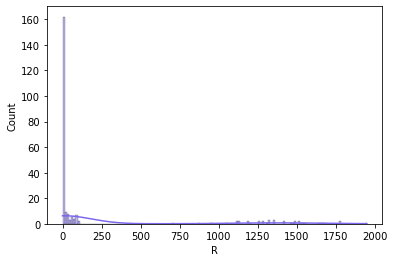

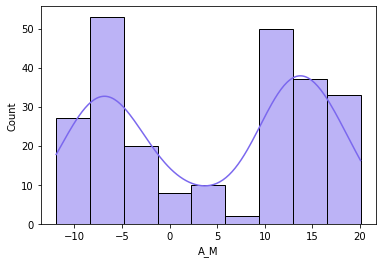

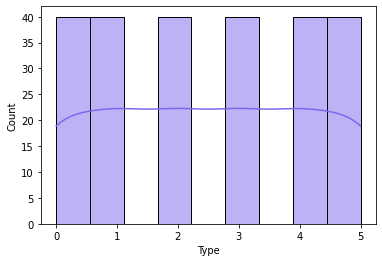

In [40]:
plt.figure(figsize=(6,8))
x = stars.drop(['Color','Spectral_Class'],axis = 1)
for i in x.columns:
    sns.histplot(x[i],kde = True, color = "mediumslateblue" )
    plt.show()

LOOKING FOR THE BEST METHOD FOR THIS MODEL

In [45]:
array = stars.values
X = array[:, 0:4]
Y = array[:, 6]
Y=Y.astype('int')
X=X.astype('int')
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [46]:
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(("DTR", DecisionTreeRegressor()))
models # the () is an argument, append let only add one 

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('DTR', DecisionTreeRegressor())]

In [47]:
results =[]
names=[]
mod=LogisticRegression(max_iter=10000)
mod.fit(X_train,Y_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [48]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, shuffle = True, random_state = seed) #splitting data on 10 parts
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR:0.963684(0.033470)
LDA:0.989737(0.020535)
KNN:0.978947(0.025784)
CART:0.995000(0.015000)
NB:0.974211(0.025806)
SVM:0.968421(0.034912)
DTR:1.000000(0.000000)


DecisionTreeRegressor is the best for this model

REARANGING

In [100]:
newhope=pd.get_dummies(data=stars,columns=["Color","Spectral_Class"],drop_first=True)

In [101]:
newhope

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
newhope = newhope[['Temperature', 'L', 'R', 'A_M', 'Color_Blue-white',
       'Color_Orange', 'Color_Red', 'Color_White', 'Color_yellow-white',
       'Spectral_Class_B', 'Spectral_Class_F', 'Spectral_Class_G',
       'Spectral_Class_K', 'Spectral_Class_M', 'Spectral_Class_O', 'Type']]

In [103]:
newhope

,Temperature,L,R,A_M,Color_Blue-white,Color_Orange,Color_Red,Color_White,Color_yellow-white,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Type
0,3068,0.002400,0.1700,16.12,0,0,1,0,0,0,0,0,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,0,1,0,0,0,0,0,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,0,1,0,0,0,0,0,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,0,1,0,0,0,0,0,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,0,0,0,0,0,0,0,0,0,1,5
236,30839,834042.000000,1194.0000,-10.63,0,0,0,0,0,0,0,0,0,0,1,5
237,8829,537493.000000,1423.0000,-10.73,0,0,0,1,0,0,0,0,0,0,0,5
238,9235,404940.000000,1112.0000,-11.23,0,0,0,1,0,0,0,0,0,0,0,5


In [107]:
scaler = StandardScaler()
scaler.fit(newhope.drop('Type',axis = 1))
scaled_features = scaler.transform(newhope.drop('Type',axis = 1))

In [108]:
hope = pd.DataFrame(scaled_features,columns = newhope.columns[:-1])
hope.head()

,Temperature,L,R,A_M,Color_Blue-white,Color_Orange,Color_Red,Color_White,Color_yellow-white,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,-0.779382,-0.598624,-0.459210,1.116745,-0.348562,-0.09167,1.069045,-0.173329,-0.185695,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
1,-0.782110,-0.598624,-0.459241,1.162414,-0.348562,-0.09167,1.069045,-0.173329,-0.185695,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
2,-0.828477,-0.598624,-0.459342,1.362213,-0.348562,-0.09167,1.069045,-0.173329,-0.185695,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
3,-0.807496,-0.598624,-0.459229,1.167171,-0.348562,-0.09167,1.069045,-0.173329,-0.185695,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
4,-0.897819,-0.598624,-0.459340,1.491607,-0.348562,-0.09167,1.069045,-0.173329,-0.185695,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214


MODEL TRAINING


In [125]:
X = hope
Y = newhope["Type"]
#Y=Y.astype('int')
#X=X.astype('int')
validation_size = 0.20
seed = 101
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [126]:
mod=DecisionTreeClassifier(random_state=1)
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)
pred

array([2, 3, 0, 3, 0, 4, 4, 3, 0, 0, 5, 5, 5, 3, 3, 1, 1, 5, 3, 2, 2, 0,
       5, 3, 0, 5, 5, 2, 3, 2, 5, 1, 3, 3, 1, 3, 4, 3, 3, 0, 3, 3, 0, 0,
       2, 4, 1, 1], dtype=int64)

In [127]:
print(confusion_matrix(Y_test,pred))

[[ 9  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0  8]]


In [128]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [129]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

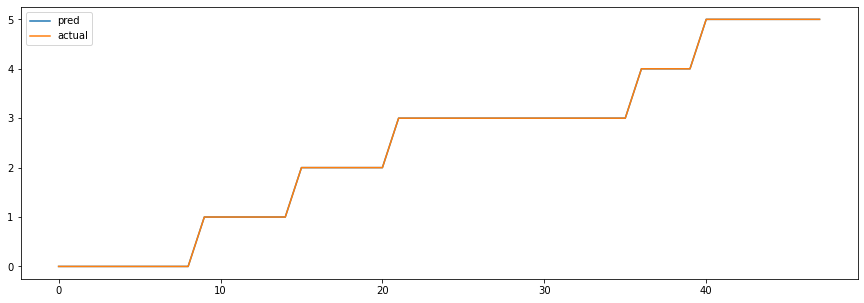

In [130]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()